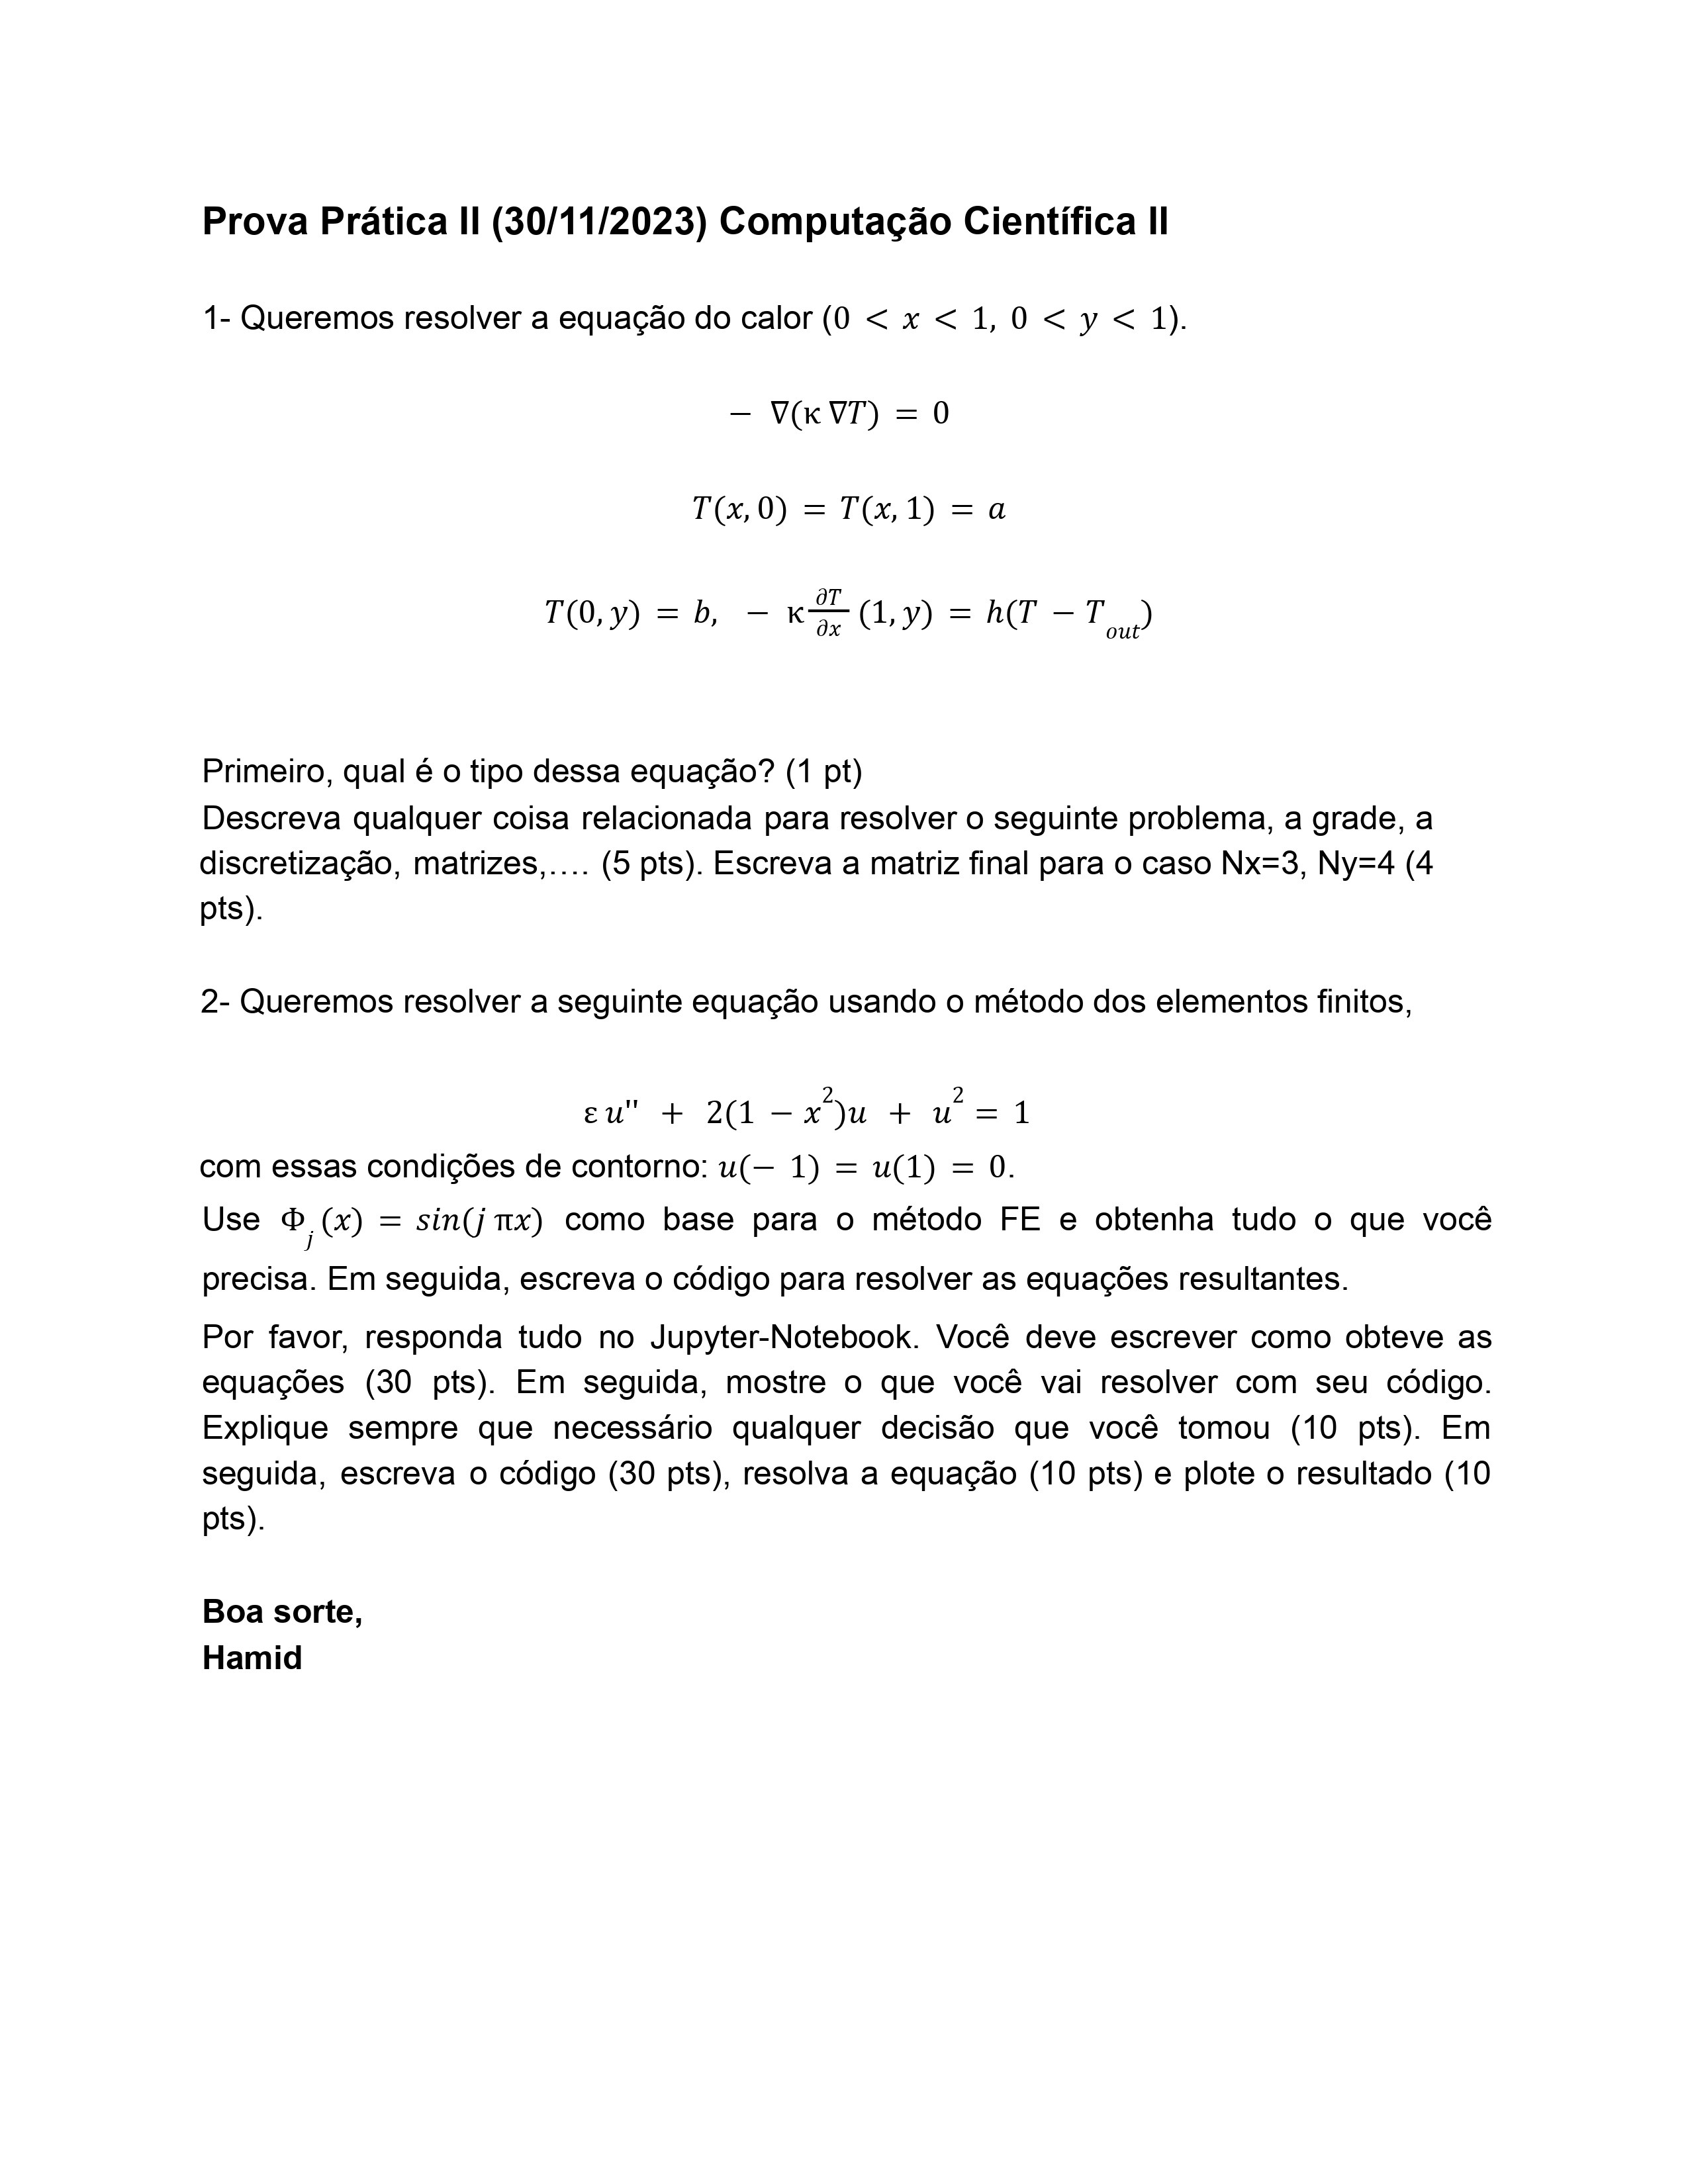

# **Question 1**

Part 1:

The given equation is a steady-state second-order, elliptic PDE. Where:

T(x,0)=T(x,1)=a represents Dirichlet boundary conditions on the top and bottom boundaries.

T(0,y)=b represents a Dirichlet boundary condition on the left boundary.

−∂x/∂T(1,y)κ=h(T−T_out) represents a Neumann boundary condition on the right boundary.


Part 2:

Grid and Discretization:
Discretize the spatial domain (0 < x < 1, 0 < y < 1) into a grid with Nx points in the x-direction and Ny points in the y-direction.
Use finite difference methods to discretize the Laplacian operator and represent the derivatives.

Matrices:
After discretizing the equation, we will obtain a system of algebraic equations that can be written in matrix form AT=b, where T is the vector containing all temperature values at grid points, A (12x12) is the coefficient matrix, and b is the right-hand side vector.


Parte 3:


# **Question 2**

The FEM involves constructing a system of equations to approximate the solution. The computation of entries for the system matrix A is given by ***integrating the product of derivatives of basis functions across the domain.***

Let's define the given function base function, and assemble the matrix A, the vector b and vector c, using FEM to solve the system (Ac=b) and plot the graph.

<ipython-input-2-5dc405eb8b8b>:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(lambda x: phij_mul_phik(x, j, k), -1, 1)
<ipython-input-2-5dc405eb8b8b>:13: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, _ = quad(lambda x: phij_mul_phik(x, j, k), -1, 1)


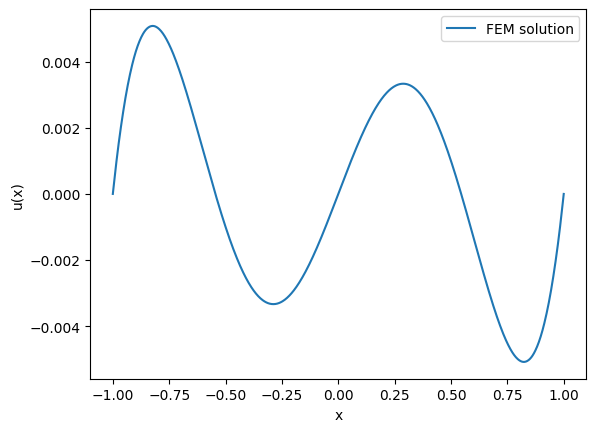

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Functions
def phi(x, j):
    return np.sin(j * np.pi * x)

def phij_mul_phik(x, j, k):
    return np.cos(j * np.pi * x) * (j * np.pi) * np.cos(k * np.pi * x) * (k * np.pi)

def integrate_phis(j, k):
    result, _ = quad(lambda x: phij_mul_phik(x, j, k), -1, 1)
    return result

def FEM(N, epsilon):
    A = np.array([[epsilon * integrate_phis(j, k) + 2 * integrate_phis(j, k) - 2 * epsilon * ((-1) ** (j + k)) / (j * k * np.pi**2) for k in range(1, N + 1)] for j in range(1, N + 1)])
    b = np.array([2 * ((-1) ** j) / (j * np.pi) for j in range(1, N + 1)])

    # Boundary conditions
    A[0, :] = 0
    A[0, 0] = 1
    A[-1, :] = 0
    A[-1, -1] = 1
    b[0] = 0
    b[-1] = 0

    c_j = np.linalg.solve(A, b)
    return c_j

def reconstruct_solution(x, c_j):
    return sum(c_j[j - 1] * phi(x, j) for j in range(1, len(c_j) + 1))

# Solve the system
N = 50
eps = 0.01
c_j = FEM(N, eps)
x = np.linspace(-1, 1, 1000)
u = [reconstruct_solution(x, c_j) for x in x]

# Plot the graph
plt.plot(x, u, label='FEM solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.show()